# Maybe trekk avstand is relevant

-   because maybe when boats travel over longer distances they come across a more varying group of species. 

In [2]:
import warnings # Got an irritating warning
warnings.filterwarnings('ignore')
import pandas as pd
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('float_format', '{:f}'.format)

In [3]:
dataset = pd.read_csv("H:\Informasjonsvitenskap\Programming\Python\Info-284\Info284_Project\Exam Task\Dataset\elektronisk-rapportering-ers-2018-fangstmelding-dca-simple.csv", sep=";")

# Dataset where the species isn't the same as the main-species
bycatch = dataset[dataset['Art FAO'] != dataset['Hovedart FAO']]

In [4]:
print(bycatch["Trekkavstand"].describe())

count     210114.000000
mean       16815.527666
std        87925.570696
min            0.000000
25%         2790.000000
50%         9063.000000
75%        25190.000000
max     15888632.000000
Name: Trekkavstand, dtype: float64


In [5]:
print(dataset["Trekkavstand"].describe())

count     305410.000000
mean       15663.968262
std        90330.847329
min            0.000000
25%         2533.000000
50%         7598.000000
75%        22599.000000
max     15888632.000000
Name: Trekkavstand, dtype: float64


Maybe check how often Torsk is caught as a Bycatch when they use a bunntrål.

weight to trekkavstand for torsk caught with bunntrål

from before we knew bunntrål otter is most common for torsk

In [6]:
torsk_only_dataset = dataset[dataset["Art FAO"] == "Torsk"]
torsk_only_dataset = torsk_only_dataset[torsk_only_dataset["Trekkavstand"] < 200000]

torsk_as_Bycatch = torsk_only_dataset[torsk_only_dataset["Hovedart FAO"] != "Torsk"]
torsk_as_Bycatch = torsk_as_Bycatch[torsk_as_Bycatch["Redskap FAO"] == "Bunntrål, otter"]

torsk_as_main = torsk_only_dataset[torsk_only_dataset["Hovedart FAO"] == "Torsk"]
torsk_as_main = torsk_as_main[torsk_as_main["Redskap FAO"] == "Bunntrål, otter"]

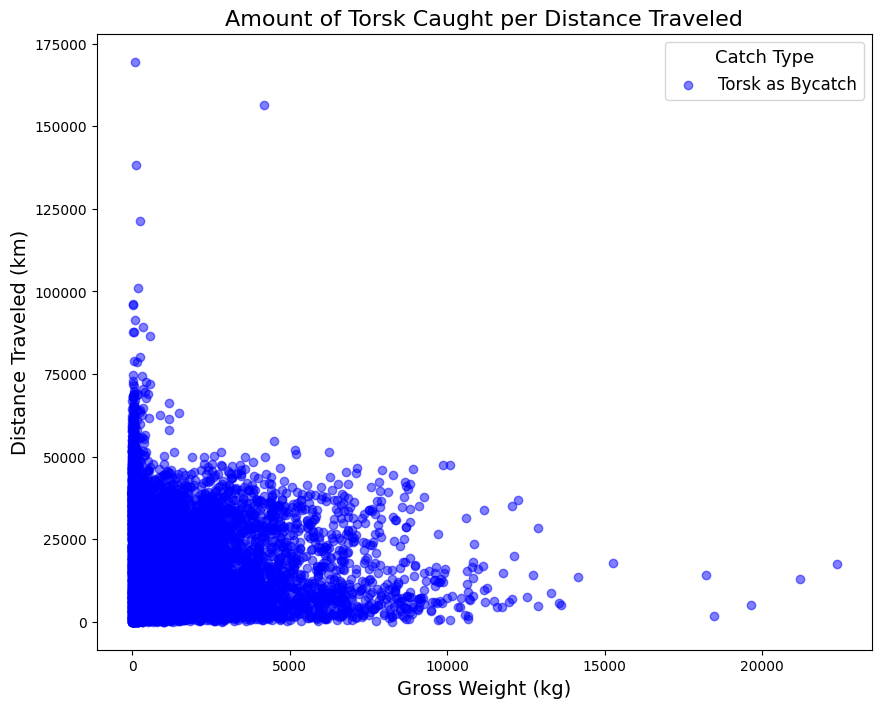

In [7]:
plt.figure(figsize=(10, 8))

# Scatter plot for bycatch
plt.scatter(torsk_as_Bycatch["Rundvekt"], torsk_as_Bycatch["Trekkavstand"], color='blue', alpha=0.5, label='Torsk as Bycatch')

# Adding labels and title
plt.xlabel("Gross Weight (kg)", fontsize=14)
plt.ylabel("Distance Traveled (km)", fontsize=14)
plt.title("Amount of Torsk Caught per Distance Traveled", fontsize=16)

# Adding a legend to distinguish between the two datasets
plt.legend(title="Catch Type", title_fontsize='13', fontsize='12')

# Show the plot
plt.show()

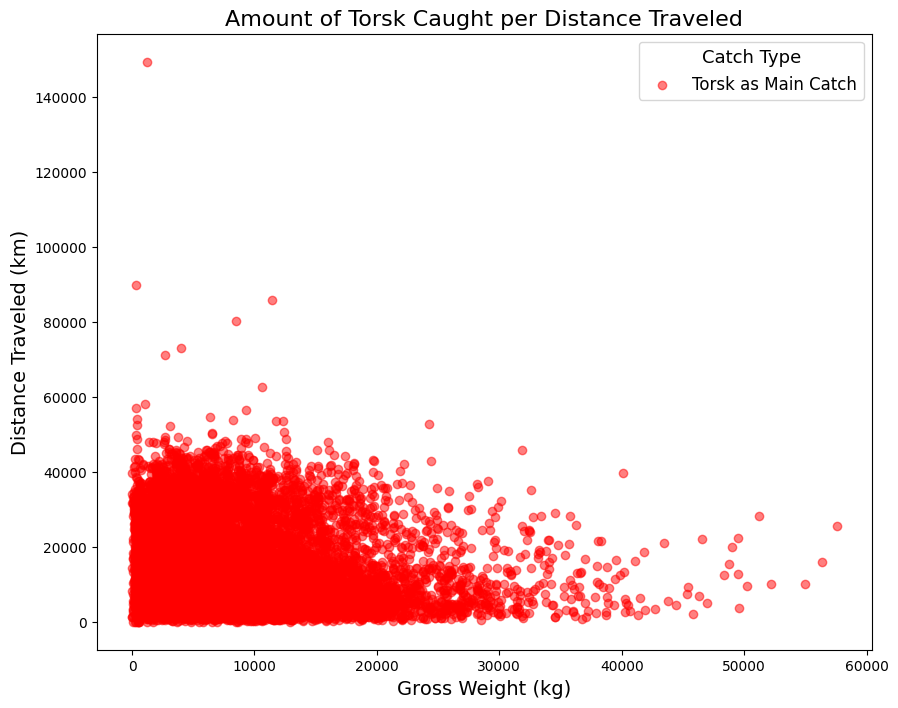

In [8]:
plt.figure(figsize=(10, 8))

# Scatter plot for main catch
plt.scatter(torsk_as_main["Rundvekt"], torsk_as_main["Trekkavstand"], color='red', alpha=0.5, label='Torsk as Main Catch')

# Adding labels and title
plt.xlabel("Gross Weight (kg)", fontsize=14)
plt.ylabel("Distance Traveled (km)", fontsize=14)
plt.title("Amount of Torsk Caught per Distance Traveled", fontsize=16)

# Adding a legend to distinguish between the two datasets
plt.legend(title="Catch Type", title_fontsize='13', fontsize='12')

# Show the plot
plt.show()

Looks like the distance traveled is mostly the same when we exclude a few outliers, therefore i believe it really doesnt matter if trekkavstand is in or not 